In [100]:
# importing the libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# reading the data 
carData = pd.read_csv('C:/Users/MAHAJAN/Desktop/Upgrad Resources/LR Assignment/CarPrice_Assignment.csv')

In [103]:
# getting the number of rows and columns in dataset
carData.shape

(205, 26)

In [104]:
# viewing the intial 5 rows in dataset
carData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [105]:
# finding percentage of missing values in each column
round(carData.isnull().sum()/len(carData.index), 2)*100
# there are no missing values

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [106]:
# dropping duplicates data from the dataset
carData=carData.drop_duplicates()

In [107]:
# no duplicates were there in the original dataset
carData.shape

(205, 26)

In [108]:
# deriving company name from carname
carData['companyName'] = carData['CarName'].apply(lambda row: row.split(" ")[0]) 
carData['companyName'] = carData['companyName'].str.lower()

In [110]:
carData.companyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [111]:
# there are descrepencies with company name
# correcting them
carData['companyName'] = carData['companyName'].str.replace("maxda", "mazda")
carData['companyName'] = carData['companyName'].str.replace("porcshce", "porsche")
carData['companyName'] = carData['companyName'].str.replace("toyouta", "toyota")
carData['companyName'] = carData['companyName'].str.replace("vw", "volkswagen")
carData['companyName'] = carData['companyName'].str.replace("vokswagen", "volkswagen")

In [112]:
carData['companyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [113]:
# dropping column car_ID and CarName
carData = carData.drop(['car_ID', "CarName"], axis=1)

In [114]:
carData.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [115]:
carData.shape

(205, 25)

### Visualizing the data

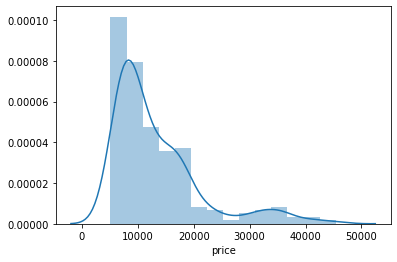

In [116]:
#price distribution plot
sns.distplot(carData.price)
# so, Price is normally distributed 

### visualizing the categorical variables
Symboling, 
companyname, 
fueltype, 
aspiration, 
doornumber, 
carbody, 
drivewheel, 
enginelocation, 
enginetype, 
cylindernumber, 
fuelsystem


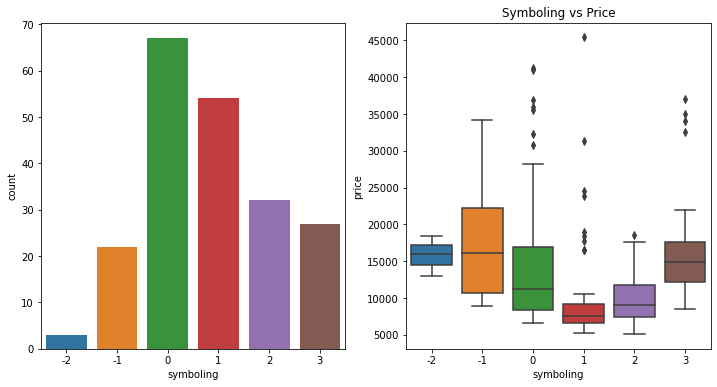

In [117]:
# visualizing the symboling column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=carData.symboling, y=carData.price)

plt.show()

##Inference
# symboling with value 0 are high in number
# cars with symboling with -1 are higher in price

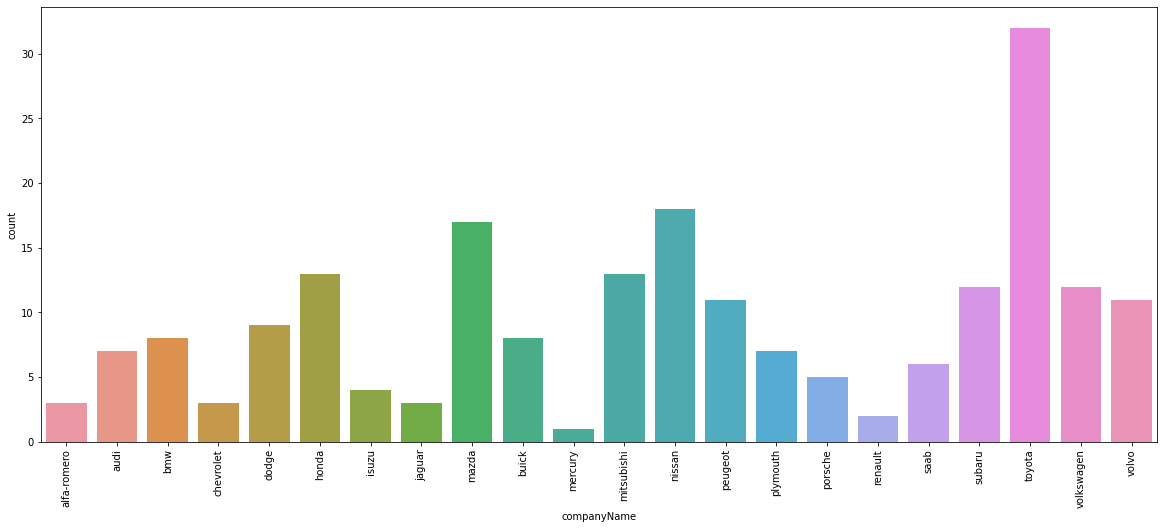

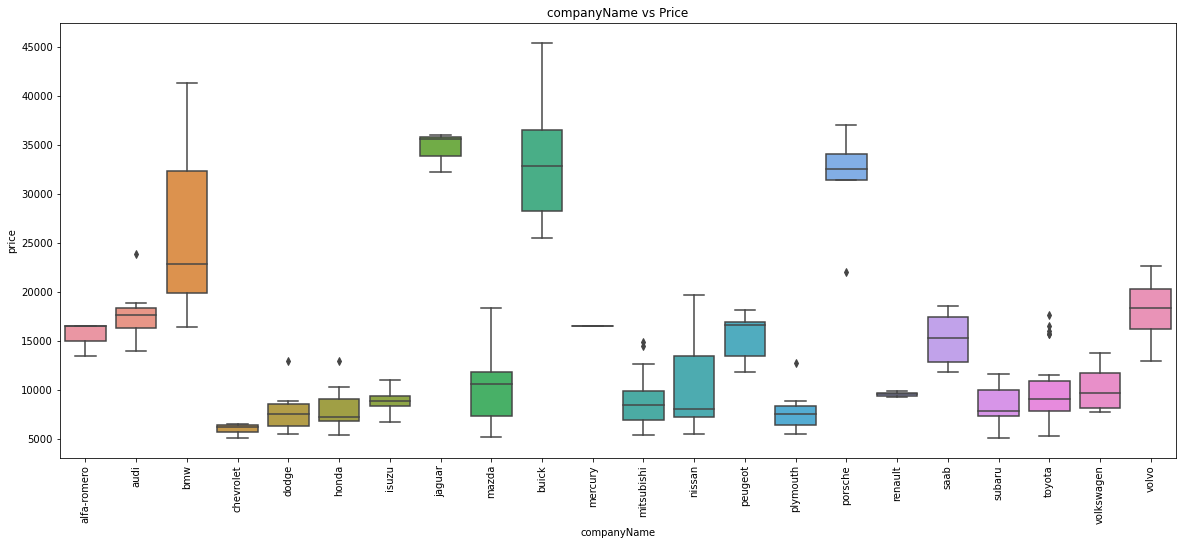

In [118]:
# visualizing the companyName column with price
plt.figure(figsize=(20,8))
fig = sns.countplot(carData.companyName)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);
plt.show()

plt.figure(figsize=(20,8))
plt.title('companyName vs Price')
fig = sns.boxplot(x=carData.companyName, y=carData.price)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);
plt.show()

##Inference
# toyota cars are high in number
# chevrolet is the car staring with minimum price and jaquar is the car with higest price

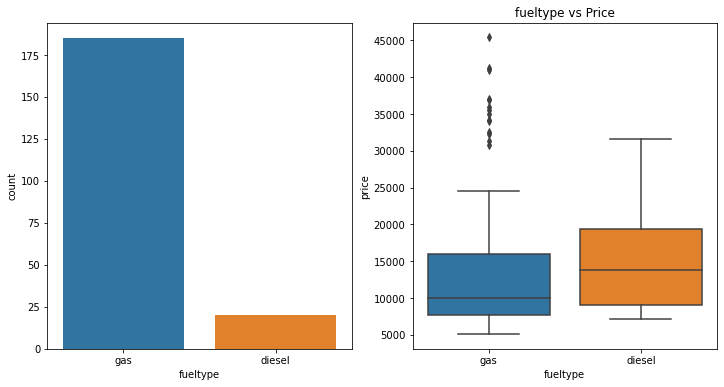

In [119]:
# visualizing the fueltype column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.fueltype)

plt.subplot(1,2,2)
plt.title('fueltype vs Price')
sns.boxplot(x=carData.fueltype, y=carData.price)

plt.show()

##Inference
# numbre of cars with fueltype gas is high

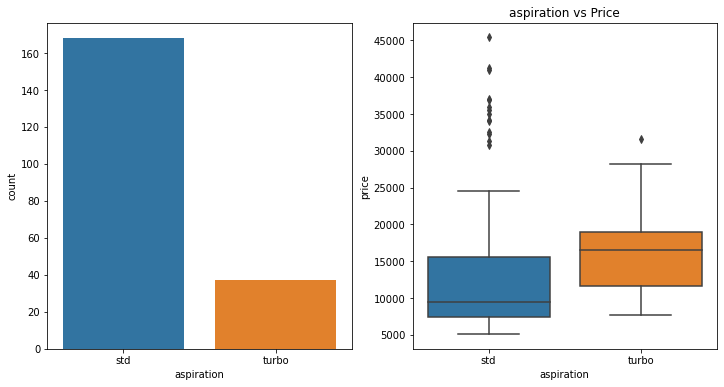

In [120]:
# visualizing the aspiration column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.aspiration)

plt.subplot(1,2,2)
plt.title('aspiration vs Price')
sns.boxplot(x=carData.aspiration, y=carData.price)

plt.show()

##Inference
# cars with std aspiration are high

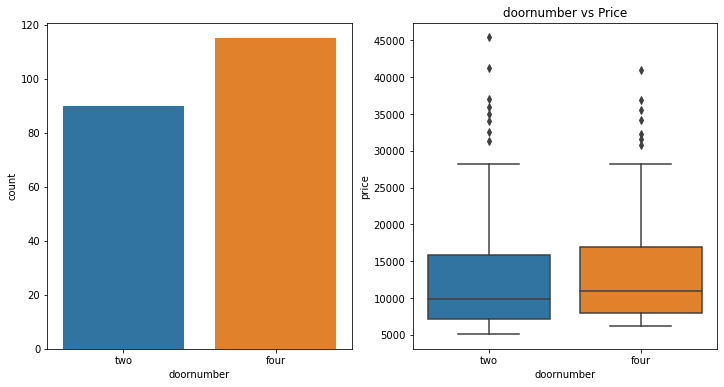

In [121]:
# visualizing the doornumber column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.doornumber)

plt.subplot(1,2,2)
plt.title('doornumber vs Price')
sns.boxplot(x=carData.doornumber, y=carData.price)

plt.show()

##Inference
# door number doesn't affect the price

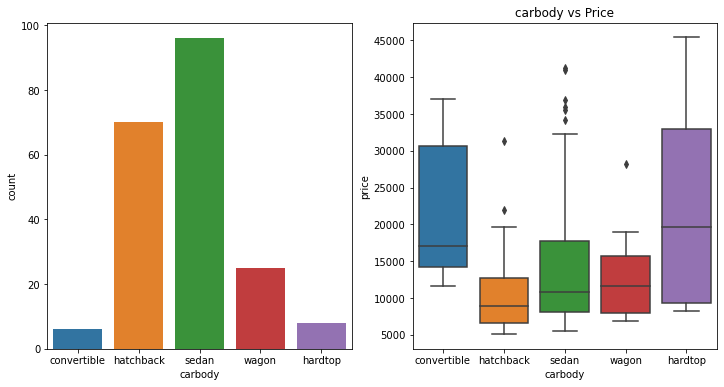

In [122]:
# visualizing the carbody column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.carbody)

plt.subplot(1,2,2)
plt.title('carbody vs Price')
sns.boxplot(x=carData.carbody, y=carData.price)

plt.show()

##Inference
# car body makes a difference to price

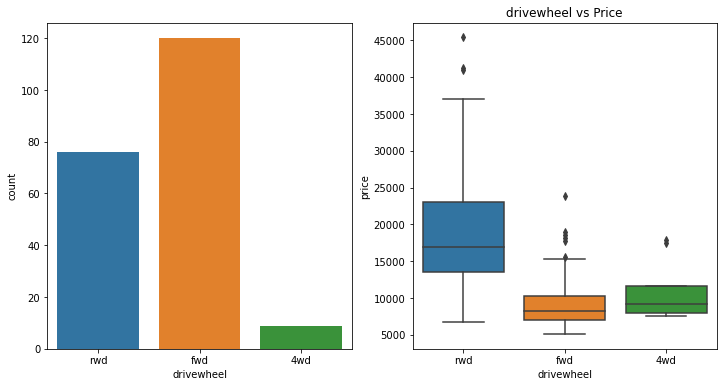

In [123]:
# visualizing the drivewheel column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.drivewheel)

plt.subplot(1,2,2)
plt.title('drivewheel vs Price')
sns.boxplot(x=carData.drivewheel, y=carData.price)

plt.show()

##Inference
# drivewheel also makes a difference to price

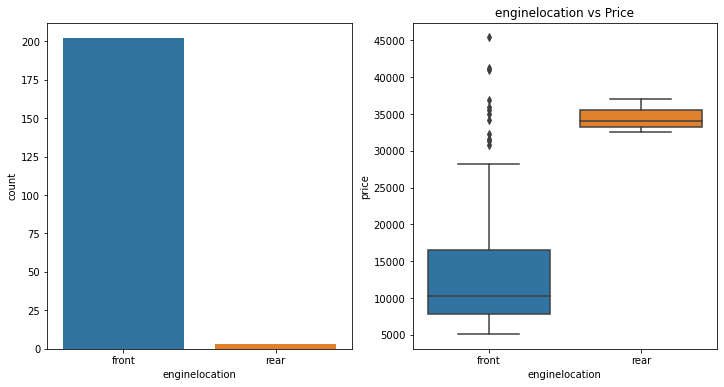

In [124]:
# visualizing the enginelocation column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.enginelocation)

plt.subplot(1,2,2)
plt.title('enginelocation vs Price')
sns.boxplot(x=carData.enginelocation, y=carData.price)

plt.show()

##Inference
# enginelocation also makes difference to price

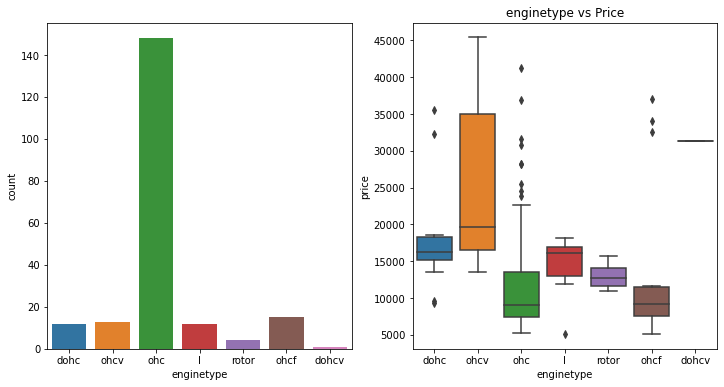

In [125]:
# visualizing the enginetype column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.enginetype)

plt.subplot(1,2,2)
plt.title('enginetype vs Price')
sns.boxplot(x=carData.enginetype, y=carData.price)

plt.show()

##Inference
# enginetype also makes difference to price

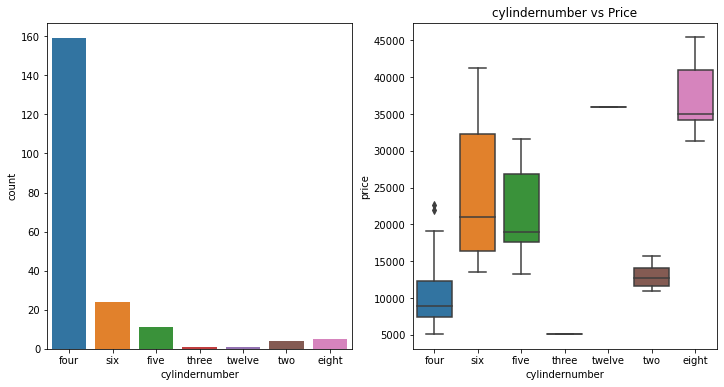

In [126]:
# visualizing the cylindernumber column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.cylindernumber)

plt.subplot(1,2,2)
plt.title('cylindernumber vs Price')
sns.boxplot(x=carData.cylindernumber, y=carData.price)

plt.show()

##Inference
# cylindernumber also makes difference to price

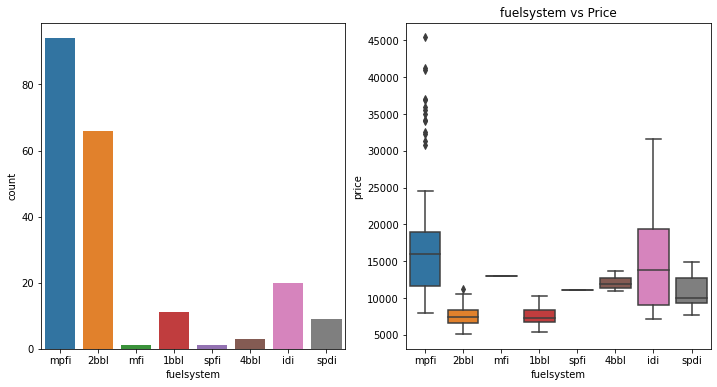

In [127]:
# visualizing the fuelsystem column with price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(carData.fuelsystem)

plt.subplot(1,2,2)
plt.title('fuelsystem vs Price')
sns.boxplot(x=carData.fuelsystem, y=carData.price)

plt.show()

##Inference
# fuelsystem also makes difference to price

<Figure size 1440x576 with 0 Axes>

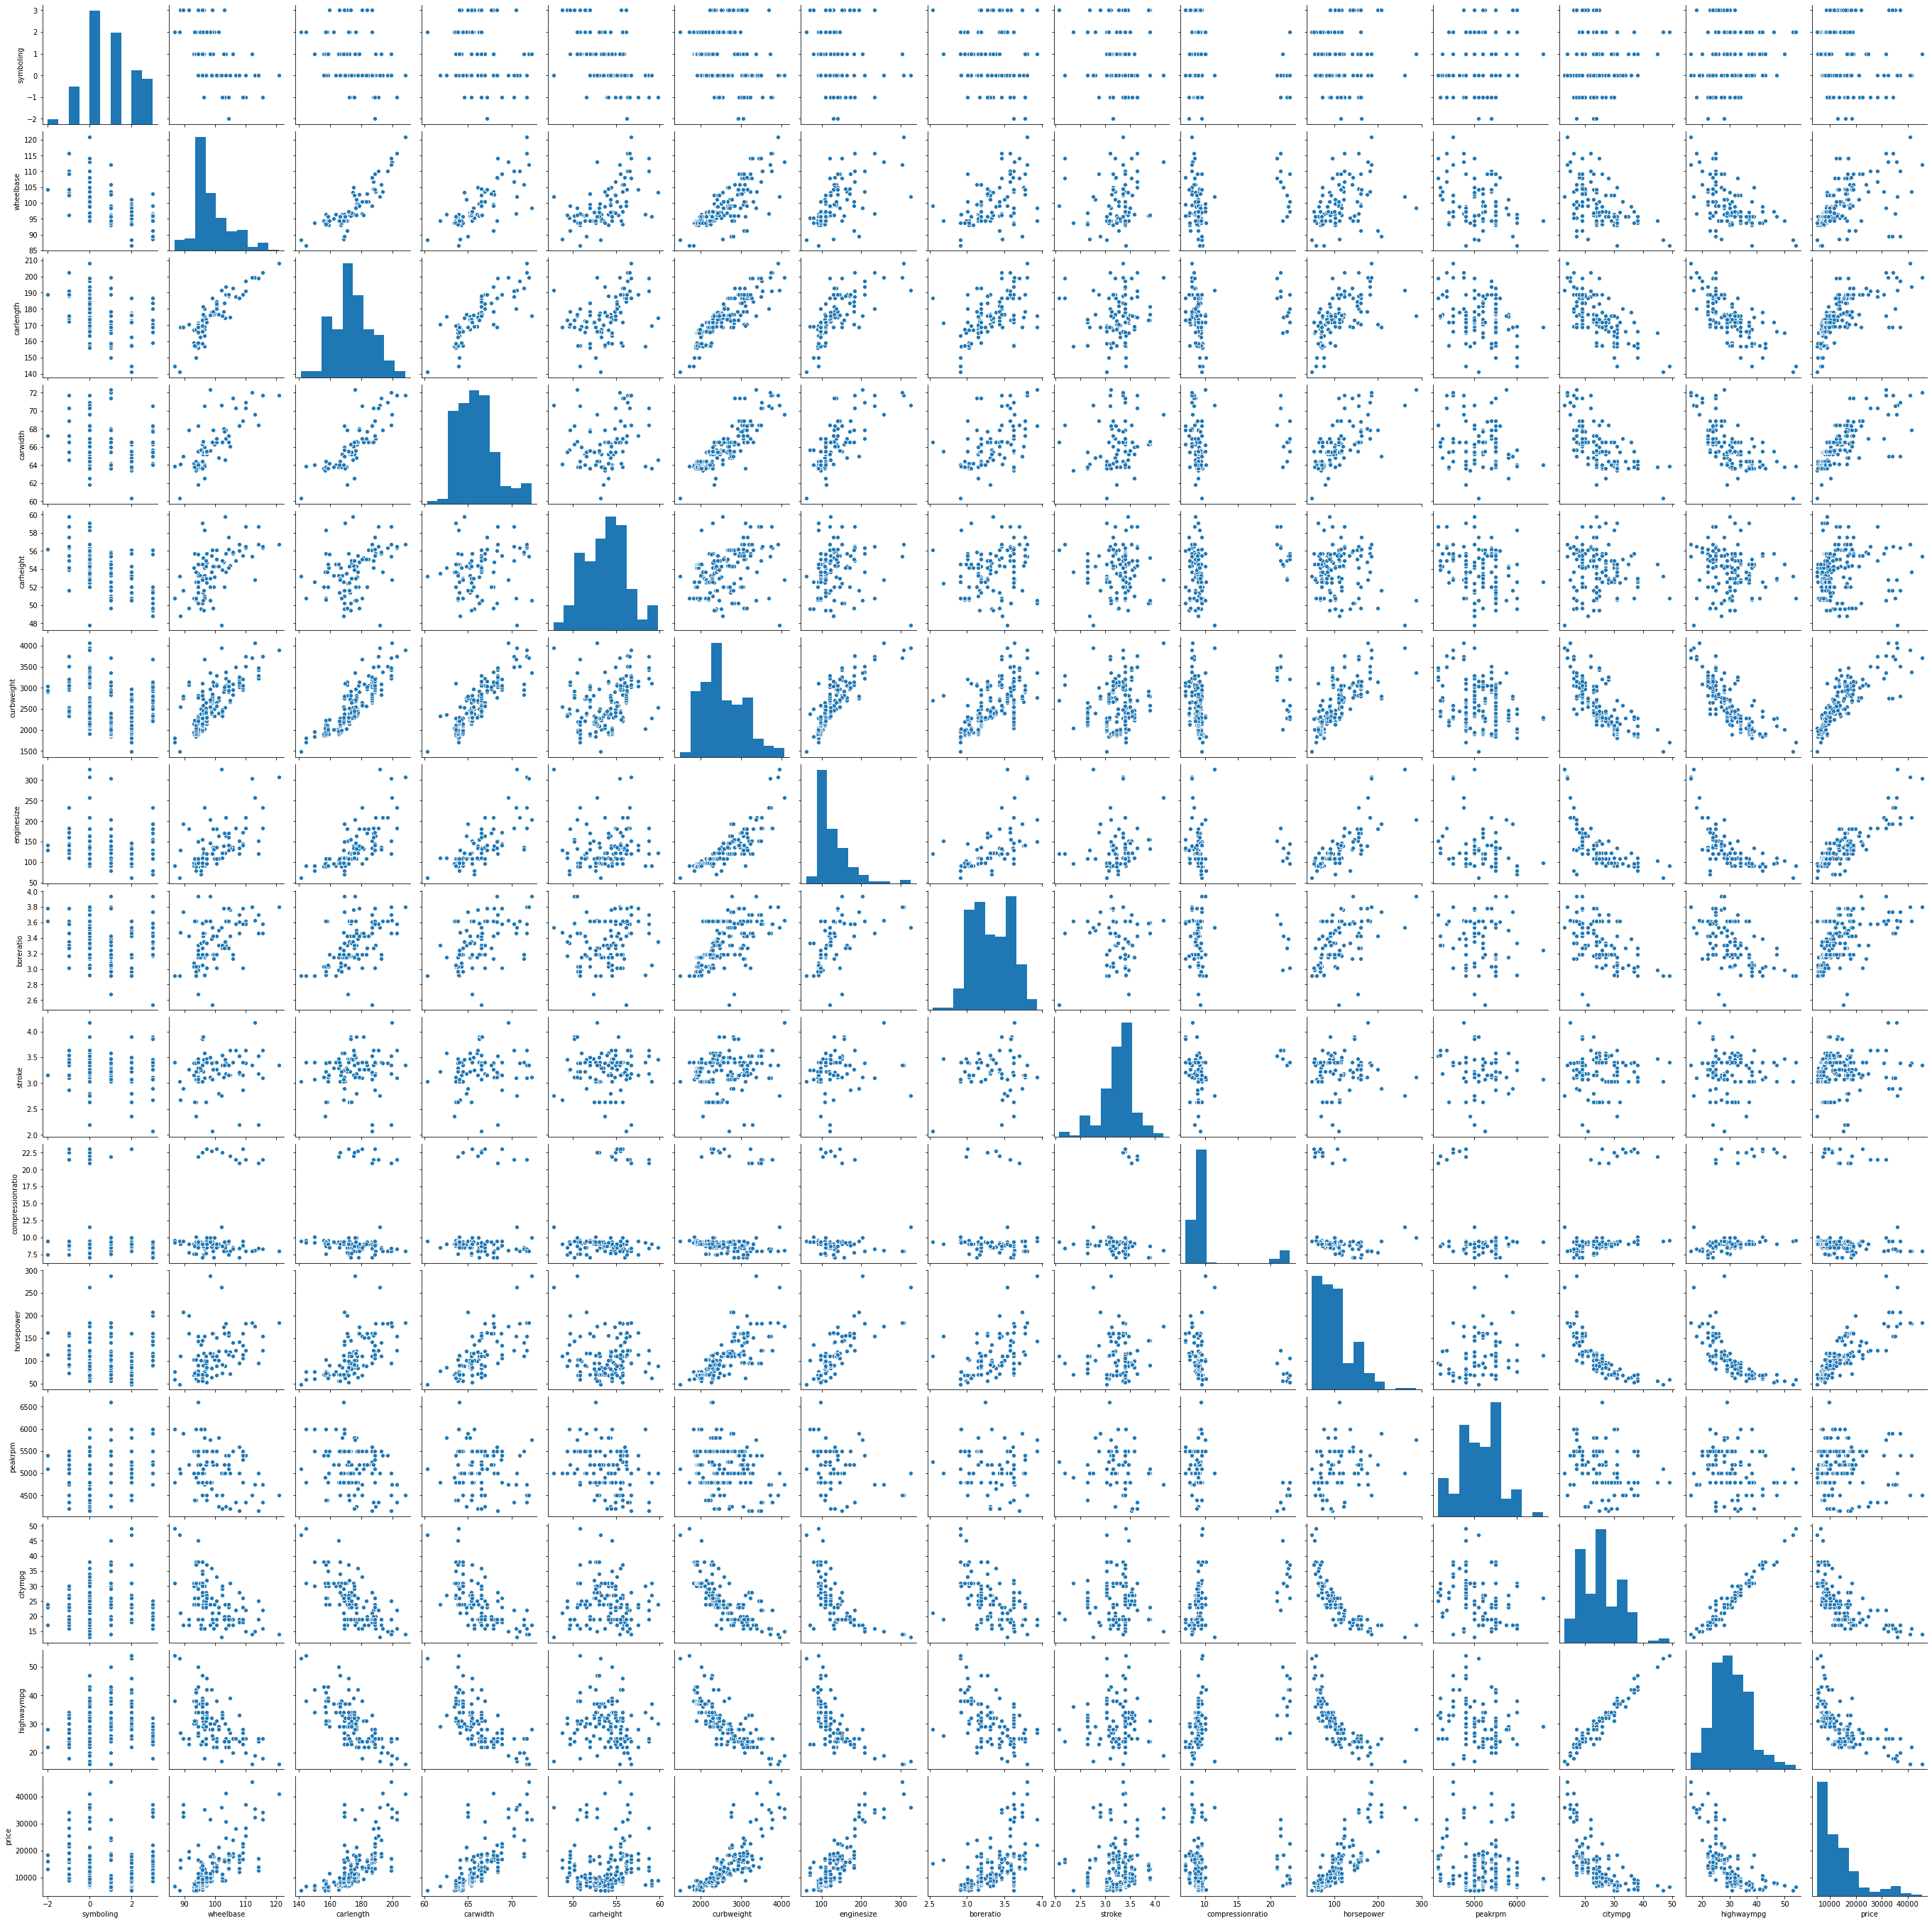

In [128]:
# pair plot for data
plt.figure(figsize=(20, 8))
sns.pairplot(carData)
plt.show()

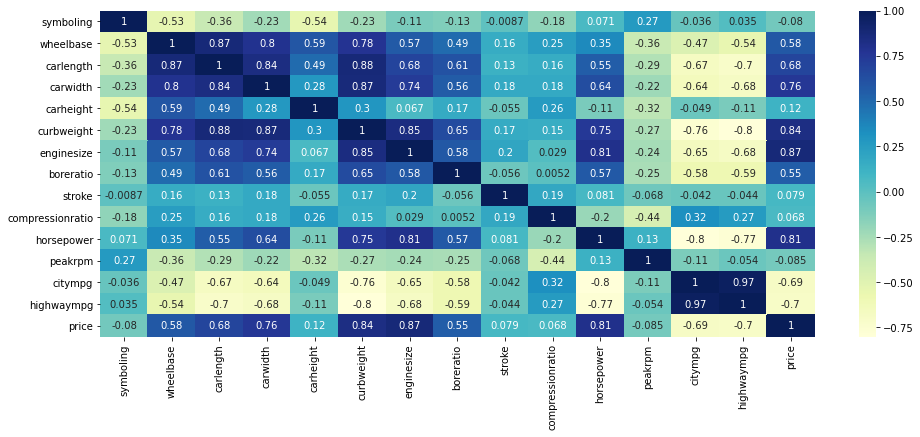

In [129]:
# correlation of variables
plt.figure(figsize=(16, 6))
corr = carData.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

from the correlation matrix there are variables which are highly corelated
1) carwidth and wheelbase
2) carwidth and carlength
3) curbweigth and wheelbase
4) curbweigth and carlength
5) curbweigth and carwidth
6) enginesize and carwidth
7) curbweigth and enginesize
8) citympg and highwaympg

In [130]:
carData.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'companyName'],
      dtype='object')

In [131]:
# create binning for symboling column
def getRating(row):
    if row >= -3 and row <=0:
        return 'Safe'
    elif row >0 and row <=3:
        return 'Risky'
    else:
        return ''
carData['risk_rating'] = carData['symboling'].apply(lambda row: getRating(row))
carData['risk_rating'].unique()

array(['Risky', 'Safe'], dtype=object)

In [132]:
# dorpping the symboling column
carData.drop(['symboling'], inplace=True, axis=1)

In [133]:
# creating dummy variables for categorical columns
carData = pd.get_dummies(carData, columns=['risk_rating', 'companyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                                'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
                         drop_first = False) 

In [134]:
# shape of dataset after creating dummy variables
carData.shape

(205, 76)

In [135]:
# columns after creating dummies variable
carData.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'risk_rating_Risky',
       'risk_rating_Safe', 'companyName_alfa-romero', 'companyName_audi',
       'companyName_bmw', 'companyName_buick', 'companyName_chevrolet',
       'companyName_dodge', 'companyName_honda', 'companyName_isuzu',
       'companyName_jaguar', 'companyName_mazda', 'companyName_mercury',
       'companyName_mitsubishi', 'companyName_nissan', 'companyName_peugeot',
       'companyName_plymouth', 'companyName_porsche', 'companyName_renault',
       'companyName_saab', 'companyName_subaru', 'companyName_toyota',
       'companyName_volkswagen', 'companyName_volvo', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan

### Rescaling the features

In [136]:
# importing the library to rescale the feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [137]:
# numerical datatype in dataset
numCols = ['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
          'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

In [138]:
#applying the scaling features to numerical dolumns only

carData[numCols] = scaler.fit_transform(carData[numCols])

carData.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0,0,0,0,0,0,0,1,0,0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0,0,0,0,0,0,0,1,0,0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,...,0,0,0,0,0,0,0,1,0,0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,...,0,0,0,0,0,0,0,1,0,0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,...,0,0,0,0,0,0,0,1,0,0


In [139]:
# Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
car_train, car_test = train_test_split(carData, train_size = 0.7, test_size = 0.3, random_state = 100)

In [140]:
y_train = car_train.pop('price')
X_train = car_train

## building the model using RFE

In [141]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [142]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [143]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 49),
 ('carlength', False, 50),
 ('carwidth', True, 1),
 ('carheight', False, 51),
 ('curbweight', False, 48),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 22),
 ('horsepower', True, 1),
 ('peakrpm', False, 52),
 ('citympg', False, 54),
 ('highwaympg', False, 53),
 ('risk_rating_Risky', False, 26),
 ('risk_rating_Safe', False, 44),
 ('companyName_alfa-romero', False, 10),
 ('companyName_audi', False, 2),
 ('companyName_bmw', True, 1),
 ('companyName_buick', True, 1),
 ('companyName_chevrolet', False, 19),
 ('companyName_dodge', False, 12),
 ('companyName_honda', False, 14),
 ('companyName_isuzu', False, 31),
 ('companyName_jaguar', False, 28),
 ('companyName_mazda', False, 23),
 ('companyName_mercury', False, 47),
 ('companyName_mitsubishi', False, 3),
 ('companyName_nissan', False, 45),
 ('companyName_peugeot', False, 6),
 ('companyName_plymouth', False, 11),
 ('companyName_porsche', True, 1),
 ('companyNam

In [144]:
# columns to be included for our model
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'companyName_bmw', 'companyName_buick', 'companyName_porsche',
       'companyName_saab', 'companyName_volvo', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [145]:
len(col)

20

## Building models using stats model

In [146]:
import statsmodels.api as sm 

In [147]:
X_train_rfe = X_train[col]

In [148]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [149]:
X_train_rfe.columns

Index(['const', 'carwidth', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'companyName_bmw', 'companyName_buick', 'companyName_porsche',
       'companyName_saab', 'companyName_volvo', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [150]:
# running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [151]:
# summary of linear model
# Model 1
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.89e-69
Time:                        14:24:56   Log-Likelihood:                 240.71
No. Observations:                 143   AIC:                            -443.4
Df Residuals:                     124   BIC:                            -387.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

### Calculate the VIFs for the Model1

In [152]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,cylindernumber_two,inf
13,enginetype_rotor,inf
10,enginelocation_front,76.28
1,enginesize,34.26
16,cylindernumber_four,19.05
2,boreratio,8.23
4,horsepower,6.17
0,carwidth,4.83
15,cylindernumber_five,4.70
18,cylindernumber_twelve,4.18


### generating subsequent models by removing the feature with high VIF

In [153]:
## Model 2 - removing the feature cylindernumber_two
X_train_new = X_train_new.drop(["cylindernumber_two"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.89e-69
Time:                        14:25:24   Log-Likelihood:                 240.71
No. Observations:                 143   AIC:                            -443.4
Df Residuals:                     124   BIC:                            -387.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [154]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,enginelocation_front,76.28
1,enginesize,34.26
16,cylindernumber_four,19.05
2,boreratio,8.23
13,enginetype_rotor,7.26
4,horsepower,6.17
0,carwidth,4.83
15,cylindernumber_five,4.70
18,cylindernumber_twelve,4.18
3,stroke,3.47


In [155]:
## Model 3 - removing the feature enginelocation_front
X_train_new = X_train_new.drop(["enginelocation_front"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.89e-69
Time:                        14:25:39   Log-Likelihood:                 240.71
No. Observations:                 143   AIC:                            -443.4
Df Residuals:                     124   BIC:                            -387.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

In [156]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,111.71
2,boreratio,78.61
3,stroke,52.23
15,cylindernumber_four,45.99
0,carwidth,34.67
4,horsepower,17.24
12,enginetype_rotor,6.07
17,cylindernumber_twelve,3.97
14,cylindernumber_five,3.87
13,cylindernumber_eight,2.73


In [157]:
## Model 4 - removing the feature enginesize
X_train_new = X_train_new.drop(["enginesize"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     68.60
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           6.75e-55
Time:                        14:25:50   Log-Likelihood:                 199.19
No. Observations:                 143   AIC:                            -362.4
Df Residuals:                     125   BIC:                            -309.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [158]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,32.95
1,boreratio,28.74
2,stroke,18.64
3,horsepower,16.32
14,cylindernumber_four,13.22
12,cylindernumber_eight,2.61
6,companyName_porsche,2.46
5,companyName_buick,2.41
13,cylindernumber_five,2.38
10,enginetype_ohcv,2.03


In [159]:
## Model 5 - removing the feature carwidth  
X_train_new = X_train_new.drop(["carwidth"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     54.21
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.51e-48
Time:                        14:26:12   Log-Likelihood:                 179.88
No. Observations:                 143   AIC:                            -325.8
Df Residuals:                     126   BIC:                            -275.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [160]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,boreratio,19.17
2,horsepower,15.92
1,stroke,13.61
13,cylindernumber_four,12.82
5,companyName_porsche,2.46
11,cylindernumber_eight,2.44
4,companyName_buick,2.40
12,cylindernumber_five,2.10
9,enginetype_ohcv,2.02
8,enginelocation_rear,1.70


In [161]:
## Model 6 - removing the feature boreratio
X_train_new = X_train_new.drop(["boreratio"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     47.85
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           7.92e-45
Time:                        14:26:23   Log-Likelihood:                 167.72
No. Observations:                 143   AIC:                            -303.4
Df Residuals:                     127   BIC:                            -256.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [162]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,stroke,13.15
1,horsepower,8.27
12,cylindernumber_four,6.08
4,companyName_porsche,2.45
10,cylindernumber_eight,2.36
3,companyName_buick,2.16
11,cylindernumber_five,2.04
8,enginetype_ohcv,2.02
7,enginelocation_rear,1.70
14,cylindernumber_twelve,1.40


In [163]:
## Model 7 - removing the feature stroke    
X_train_new = X_train_new.drop(["stroke"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     49.92
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           6.76e-45
Time:                        14:26:46   Log-Likelihood:                 165.64
No. Observations:                 143   AIC:                            -301.3
Df Residuals:                     128   BIC:                            -256.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [164]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.37
3,companyName_porsche,2.34
9,cylindernumber_eight,2.31
2,companyName_buick,2.14
7,enginetype_ohcv,2.01
11,cylindernumber_four,1.91
10,cylindernumber_five,1.86
6,enginelocation_rear,1.70
1,companyName_bmw,1.29
13,cylindernumber_twelve,1.26


### we have removed all the features with high VIF
now we are going to remove feature with high p-value (p-value > 0.05)

In [165]:
## Model 8 - removing the feature cylindernumber_eight with p-value 0.718  
X_train_new = X_train_new.drop(["cylindernumber_eight"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     54.12
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           9.58e-46
Time:                        14:28:26   Log-Likelihood:                 165.56
No. Observations:                 143   AIC:                            -303.1
Df Residuals:                     129   BIC:                            -261.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [166]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.19
7,enginetype_ohcv,1.96
3,companyName_porsche,1.95
10,cylindernumber_four,1.87
9,cylindernumber_five,1.62
6,enginelocation_rear,1.50
2,companyName_buick,1.43
1,companyName_bmw,1.28
12,cylindernumber_twelve,1.22
5,companyName_volvo,1.10


In [167]:
## Model 9 - removing the feature companyName_porsche wit p-value 0.570         
X_train_new = X_train_new.drop(["companyName_porsche"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     58.91
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.43e-46
Time:                        14:30:08   Log-Likelihood:                 165.38
No. Observations:                 143   AIC:                            -304.8
Df Residuals:                     130   BIC:                            -266.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [168]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,3.25
6,enginetype_ohcv,1.82
9,cylindernumber_four,1.74
8,cylindernumber_five,1.54
2,companyName_buick,1.43
1,companyName_bmw,1.21
11,cylindernumber_twelve,1.21
5,enginelocation_rear,1.13
4,companyName_volvo,1.09
7,enginetype_rotor,1.08


In [169]:
## Model 10 - removing the feature cylindernumber_five  wit p-value > 0.05         
X_train_new = X_train_new.drop(["cylindernumber_five"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     64.46
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.23e-47
Time:                        14:31:07   Log-Likelihood:                 165.10
No. Observations:                 143   AIC:                            -306.2
Df Residuals:                     131   BIC:                            -270.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [170]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.71
8,cylindernumber_four,1.62
6,enginetype_ohcv,1.60
10,cylindernumber_twelve,1.20
1,companyName_bmw,1.18
2,companyName_buick,1.17
5,enginelocation_rear,1.11
4,companyName_volvo,1.09
7,enginetype_rotor,1.06
3,companyName_saab,1.05


In [171]:
## Model 11 - removing the feature companyName_saab  wit p-value > 0.05         
X_train_new = X_train_new.drop(["companyName_saab"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     71.13
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.28e-48
Time:                        14:31:45   Log-Likelihood:                 164.83
No. Observations:                 143   AIC:                            -307.7
Df Residuals:                     132   BIC:                            -275.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [174]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.65
7,cylindernumber_four,1.62
5,enginetype_ohcv,1.59
8,cylindernumber_twelve,1.20
1,companyName_bmw,1.17
2,companyName_buick,1.17
4,enginelocation_rear,1.10
3,companyName_volvo,1.08
6,enginetype_rotor,1.06


In [173]:
## Model 12 - removing the feature cylindernumber_three  wit p-value > 0.05         
X_train_new = X_train_new.drop(["cylindernumber_three"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     78.98
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           5.62e-49
Time:                        14:32:51   Log-Likelihood:                 164.34
No. Observations:                 143   AIC:                            -308.7
Df Residuals:                     133   BIC:                            -279.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [175]:
## Model 13 - removing the feature enginetype_rotor  wit p-value > 0.05         
X_train_new = X_train_new.drop(["enginetype_rotor"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())      

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     88.45
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.12e-49
Time:                        14:33:29   Log-Likelihood:                 163.62
No. Observations:                 143   AIC:                            -309.2
Df Residuals:                     134   BIC:                            -282.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [176]:
## Model 14 - removing the feature cylindernumber_twelve       wit p-value > 0.05         
X_train_new = X_train_new.drop(["cylindernumber_twelve"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())      

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     99.21
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.66e-50
Time:                        14:33:56   Log-Likelihood:                 162.05
No. Observations:                 143   AIC:                            -308.1
Df Residuals:                     135   BIC:                            -284.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0464    

In [177]:
## Model 15 - removing the feature enginetype_ohcv wit p-value > 0.05         
X_train_new = X_train_new.drop(["enginetype_ohcv"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())      

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.93e-50
Time:                        14:34:37   Log-Likelihood:                 160.42
No. Observations:                 143   AIC:                            -306.8
Df Residuals:                     136   BIC:                            -286.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0419    

In [178]:
X_train_new.columns

Index(['horsepower', 'companyName_bmw', 'companyName_buick',
       'companyName_volvo', 'enginelocation_rear', 'cylindernumber_four'],
      dtype='object')

### so the best model is Model 15
Metrics of model are 
R-squared:                       0.833
Adj. R-squared:                  0.826
    

and important features to predict car price are 
'horsepower', 'companyName_bmw', 'companyName_buick', 'companyName_volvo', 'enginelocation_rear', 'cylindernumber_four'


### Residual Analysis of the train data

In [179]:
y_train_price = lm.predict(X_train_rfe)

In [180]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

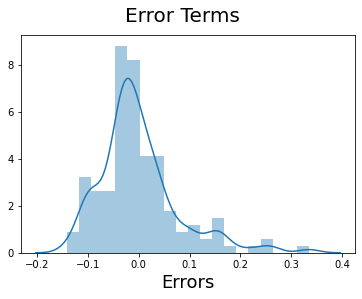

In [181]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions

In [182]:
y_test = car_test.pop('price')
X_test = car_test

In [183]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [184]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

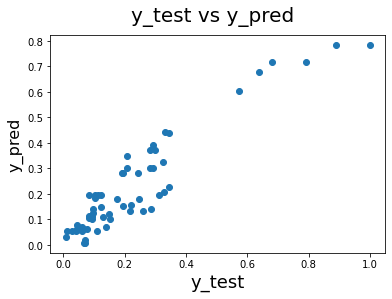

In [185]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [186]:

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model r2_score: 0.8771393413585031


r2_score on test data set is 0.877 and while r-square on tran data set is 0.837 which is comparable.
hence our model has predicted the test data set well

In [189]:
y_test.shape

(62,)

In [190]:
y_pred.shape

(62,)

Text(0, 0.5, 'Car Price')

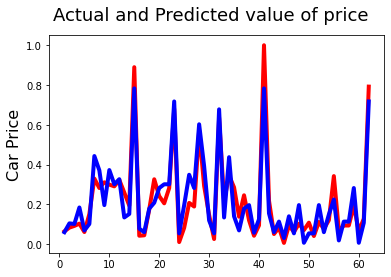

In [191]:
# viewing the predicted and actual test data value of Price
index = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(index,y_test, color="red", linewidth=4, linestyle="-") # plotting the actual price value marked in red color
plt.plot(index,y_pred, color="blue",  linewidth=4, linestyle="-") # plotting the predicted price value marked in blue color
fig.suptitle('Actual and Predicted value of price', fontsize=18)
plt.ylabel('Car Price', fontsize=16) 

###The ressulted predicted y values are almost overlapping the actual y values of test data set.